In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn import datasets, svm
import nbformat


In [2]:
housing = pd.read_csv('/home/takeshikovacs/Desktop/Datasets/California Dataset/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
airqual = pd.read_excel('/home/takeshikovacs/Desktop/Datasets/Air Quality/AirQualityUCI.xlsx')
airqual.dropna(inplace = True)

In [4]:
airqual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [5]:
airqual

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [6]:
airqual['DateTime'] = airqual['Date'].astype(str) + ' ' + airqual['Time'].astype(str)

In [7]:
airqual['DateTime'] = pd.to_datetime(airqual['DateTime'], format='%Y-%m-%d %H:%M:%S')

Line Chart: They are mainly used to identify trends over time. Time is the key thing here. It can also be used differently, but there must be some linear aspect to it.

Using Matplotlib

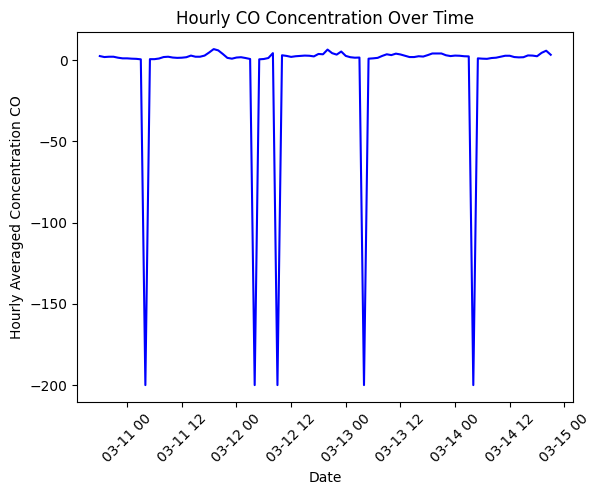

In [8]:
plt.plot(airqual['DateTime'].iloc[:100], airqual['CO(GT)'].iloc[:100], color='blue')
plt.xlabel('Date')
plt.ylabel('Hourly Averaged Concentration CO')
plt.title('Hourly CO Concentration Over Time')
plt.xticks(rotation = 45); # This rotates the xlabels by 45 degrees to avoid overlapping

Multiline Graph

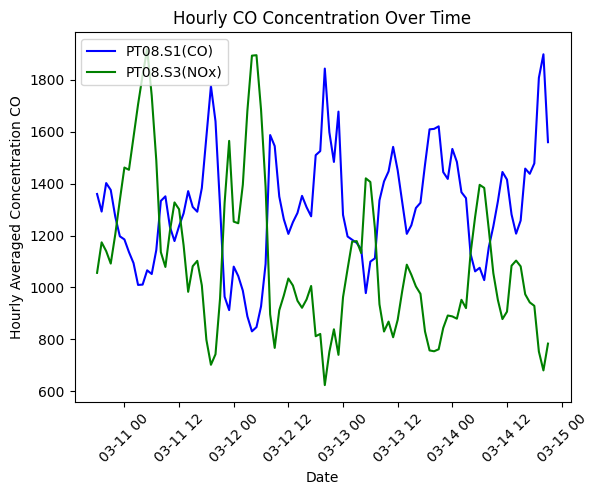

In [9]:
plt.plot(airqual['DateTime'].iloc[:100], airqual['PT08.S1(CO)'].iloc[:100], color='blue')
plt.plot(airqual['DateTime'].iloc[:100], airqual['PT08.S3(NOx)'].iloc[:100], color='green')
plt.xlabel('Date')
plt.ylabel('Hourly Averaged Concentration CO')
plt.title('Hourly CO Concentration Over Time')
plt.xticks(rotation = 45); # This rotates the xlabels by 45 degrees to avoid overlapping
plt.legend(
    labels = ['PT08.S1(CO)', 'PT08.S3(NOx)'],
    loc = 'upper left' );

Using Seaborn

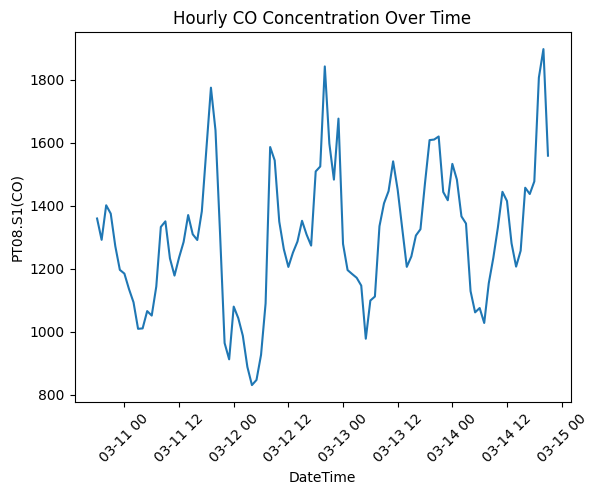

In [10]:
sns.lineplot(
    x = airqual['DateTime'].iloc[:100],
    y = airqual['PT08.S1(CO)'].iloc[:100],
    )

plt.xticks(rotation = 45);
plt.title('Hourly CO Concentration Over Time');

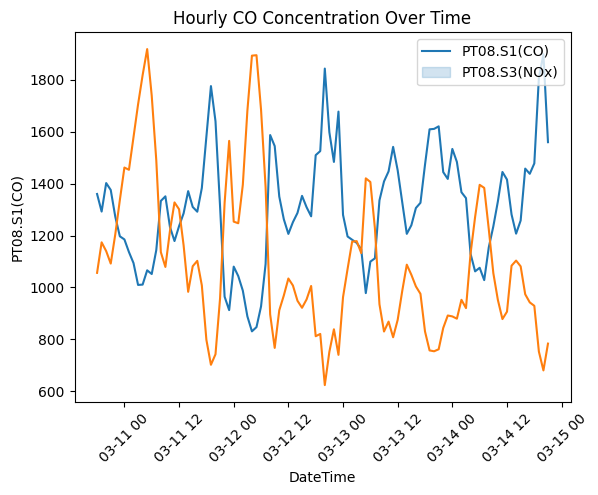

In [11]:
sns.lineplot(
    x = airqual['DateTime'].iloc[:100],
    y = airqual['PT08.S1(CO)'].iloc[:100]

    )
sns.lineplot(
    x = airqual['DateTime'].iloc[:100],
    y = airqual['PT08.S3(NOx)'].iloc[:100]  
    );

plt.xticks(rotation = 45);
plt.title('Hourly CO Concentration Over Time');
plt.legend(labels = ['PT08.S1(CO)', 'PT08.S3(NOx)']);

Using Plotly Express

In [12]:
px.line(
    data_frame = airqual.iloc[:100],
    y = 'PT08.S1(CO)',
    x = 'DateTime',
    title = 'Hourly CO Concentration Over Time'
    )


Multiline Graph Plotly Express

In [13]:
px.line(
    data_frame = airqual.iloc[:100],
    y = ['PT08.S1(CO)','PT08.S3(NOx)'],
    x = 'DateTime',
    title = 'Hourly CO Concentration Over Time'

    )


Barcharts: They are mostly used to compare discrete categories or groups<br>
They are mostly best for non-time series datasets. They can show both frequency and true count. And while it can show frequency, it is best to use a histogram for that


housing.groupby('ocean_proximity')['median_income'].sum()

Average 

Text(0.5, 1.0, 'Average Median Income based on Ocean Proximity')

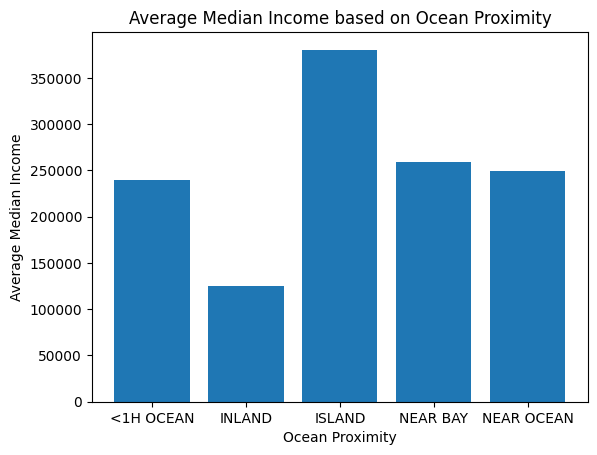

In [14]:
plt.bar(
    housing.groupby('ocean_proximity')['median_house_value'].mean().index,
    housing.groupby('ocean_proximity')['median_house_value'].mean().values
    );
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Median Income')
plt.title('Average Median Income based on Ocean Proximity')

Frequency

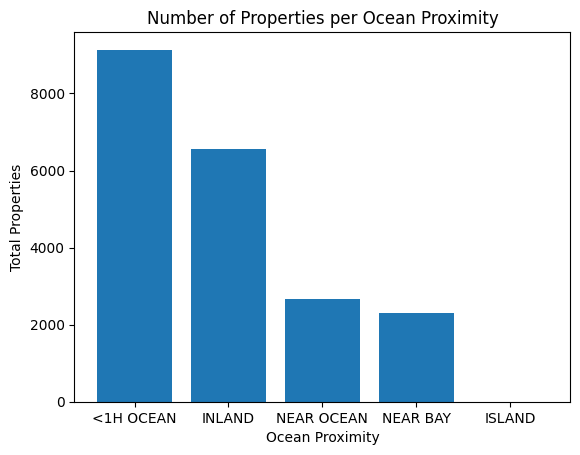

In [15]:
plt.bar(
    housing['ocean_proximity'].value_counts().index,
    housing['ocean_proximity'].value_counts().values
    );
plt.xlabel('Ocean Proximity')
plt.ylabel('Total Properties')
plt.title('Number of Properties per Ocean Proximity');

Seaborn

In [2]:
sns.barplot(
    data =pd.DataFrame(housing.groupby('ocean_proximity')['median_house_value'].median()),
    x = 'ocean_proximity',
    y = 'median_house_value'
);

NameError: name 'sns' is not defined

Plotly Express

In [17]:
pd.DataFrame(housing.groupby('ocean_proximity')['median_house_value'].median())

,median_house_value
ocean_proximity,
<1H OCEAN,214850.0
INLAND,108500.0
ISLAND,414700.0
NEAR BAY,233800.0
NEAR OCEAN,229450.0


In [18]:
px.bar(
    data_frame = pd.DataFrame(housing.groupby('ocean_proximity')['median_house_value'].median()).reset_index(),
    x = 'ocean_proximity',
    y = 'median_house_value',
    title='Median Income by Ocean Proximity'
    
    )

ScatterPlots - These are constructed to show the relationship either between two independent variables or between a dependent and an independent variable

Matplotlib


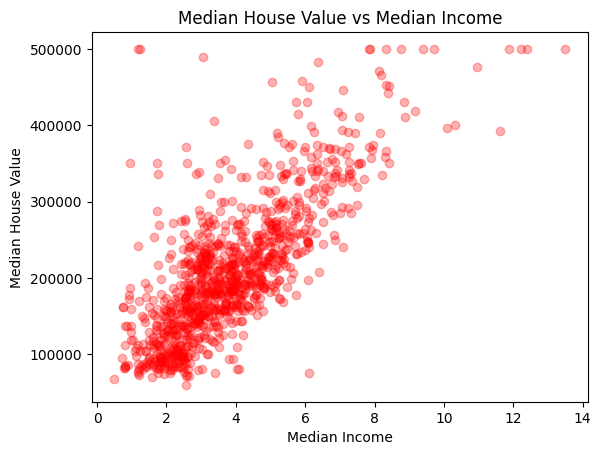

In [19]:
plt.scatter(
    x = housing['median_income'].iloc[:1000],
    y = housing['median_house_value'].iloc[:1000],
    alpha = 0.3,
    c = 'red',
);
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median House Value vs Median Income');


Seaborn

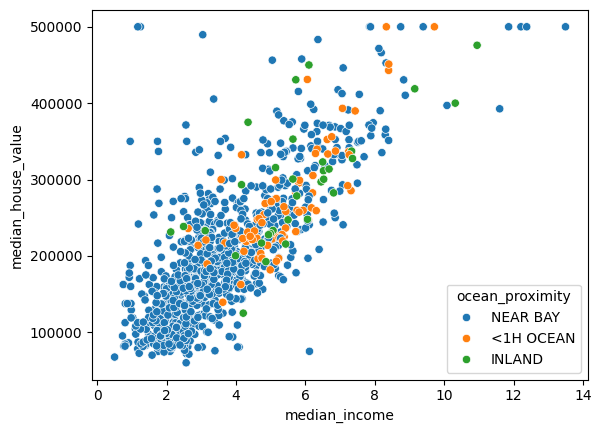

In [20]:
sns.scatterplot(
    data = housing.iloc[:1000],
    x = 'median_income',
    y = 'median_house_value',
    hue = 'ocean_proximity'
);
sns.set_palette("Set2")

Plotly Express

In [21]:
px.scatter(
    data_frame = housing.iloc[:1000],
    x = 'median_income',
    y = 'median_house_value',
    hover_data = 'ocean_proximity',
    color = 'ocean_proximity',
    color_continuous_scale="Viridis"
    
)


Bubble Charts

In [22]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
df = sns.load_dataset('iris')
df['species'] = df['species'].map({'setosa': 0, "versicolor": 1,
"virginica": 2})

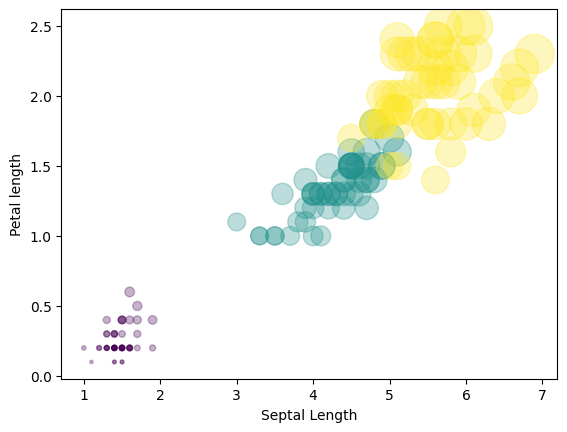

In [24]:
plt.scatter(
    df['petal_length'], 
    df['petal_width'],
    s = 50*df['petal_length']*df['petal_width'],
    c = df.species,
    alpha=0.3
)
plt.xlabel('Septal Length')
plt.ylabel('Petal length');

As you can see, bubble charts are not very interpretable

Area Chart and Stacked Plot - The area chart is basically a line chart but with shaded area<br>
The stacked chart is basically many area charts stacked together to show some sort of area


In [25]:
# House loan Mortgage cost per month for a year
houseLoanMortgage = [9000, 9000, 8000, 9000,
8000, 9000, 9000, 9000,
9000, 8000, 9000, 9000]
# Utilities Bills for a year
utilitiesBills = [4218, 4218, 4218, 4218,
4218, 4218, 4219, 2218,
3218, 4233, 3000, 3000]
# Transportation bill for a year
transportation = [782, 900, 732, 892,
334, 222, 300, 800,
900, 582, 596, 222]
# Car mortgage cost for one year
carMortgage = [700, 701, 702, 703,
704, 705, 706, 707,
708, 709, 710, 711]

months= [x for x in range(1,13)]

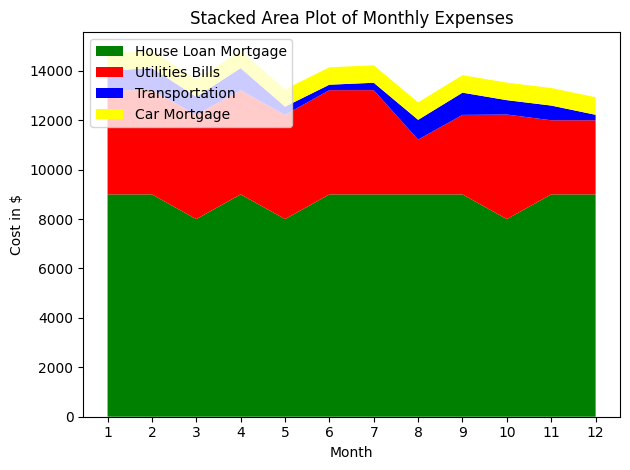

In [26]:
# stackplot(x, y)               # where y is MxN
# stackplot(x, y1, y2, y3, y4)  # where y1, y2, y3, y4, are all 1xNm This is the format
colors = ['green','red', 'blue', 'yellow']
plt.stackplot(
    months,
    houseLoanMortgage,
    utilitiesBills,
    transportation,
    carMortgage,
    labels=['House Loan Mortgage', 'Utilities Bills', 'Transportation', 'Car Mortgage'], 
    colors = colors
    )
plt.xlabel('Month')
plt.ylabel('Cost in $')
plt.title('Stacked Area Plot of Monthly Expenses')
plt.xticks(months);
plt.legend(loc='upper left');
plt.tight_layout();






Pie Chart - Easily Used to show distributions

In [27]:
df = sns.load_dataset('iris')

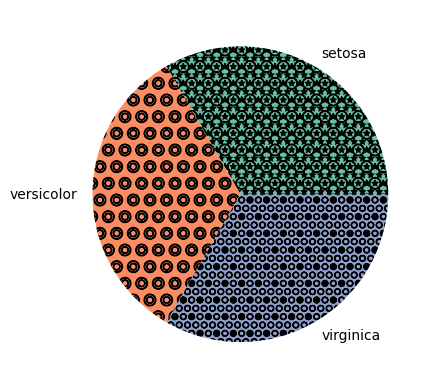

In [28]:
plt.pie(
    df['species'].value_counts(),
    labels = df['species'].value_counts().index,
    hatch=['**O', 'oO', 'O.O', '.||.']
    );


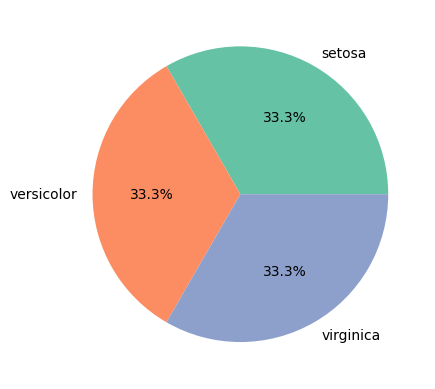

In [29]:
plt.pie(
    df['species'].value_counts(),
    labels = df['species'].value_counts().index,
    autopct='%1.1f%%'
    );

Table Charts

In [30]:
# Years under consideration
years = ["2010", "2011", "2012", "2013", "2014"]
# Available watt
columns = ['4.5W', '6.0W', '7.0W','8.5W','9.5W','13.5W','15W']
unitsSold = [
[65, 141, 88, 111, 104, 71, 99],
[85, 142, 89, 112, 103, 73, 98],
[75, 143, 90, 113, 89, 75, 93],
[65, 144, 91, 114, 90, 77, 92],
[55, 145, 92, 115, 88, 79, 93],
]
# Define the range and scale for the y axis
values = np.arange(0, 600, 100)

Polar Chart - Used to compare performance or values of similar features. Eg comparing marks you got in an exam since they are all out of 100%

In [31]:
subjects = ["C programming", "Numerical methods", "Operating system", "DBMS", "Computer Networks"]
plannedGrade = [90, 95, 92, 68, 68, 90]
actualGrade = [75, 89, 89, 80, 80, 75]

theta = np.linspace(0, 2 * np.pi, len(plannedGrade))

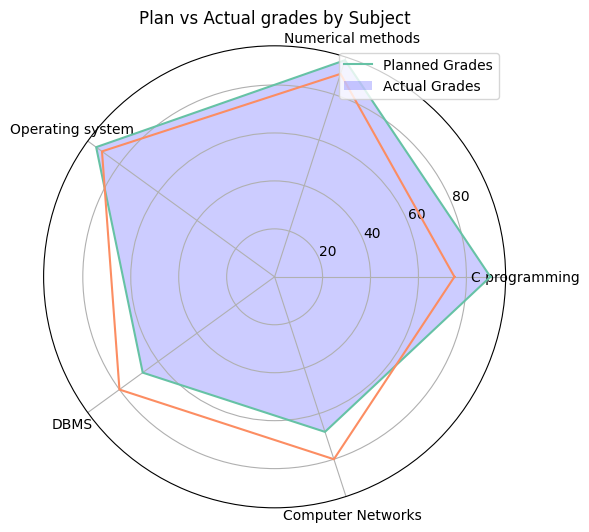

In [32]:
plt.figure(figsize = (10,6))
plt.subplot(polar=True)
(lines,labels) = plt.thetagrids(range(0,360,
int(360/len(subjects))),
(subjects))
plt.plot(theta, plannedGrade)
plt.fill(theta, plannedGrade, 'b', alpha=0.2)
plt.plot(theta, actualGrade)
plt.legend(labels=('Planned Grades','Actual Grades'),loc=1)
plt.title("Plan vs Actual grades by Subject");

Histogram - This is one of the most used. It helps us depict the distribution of continuous variables

In [33]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


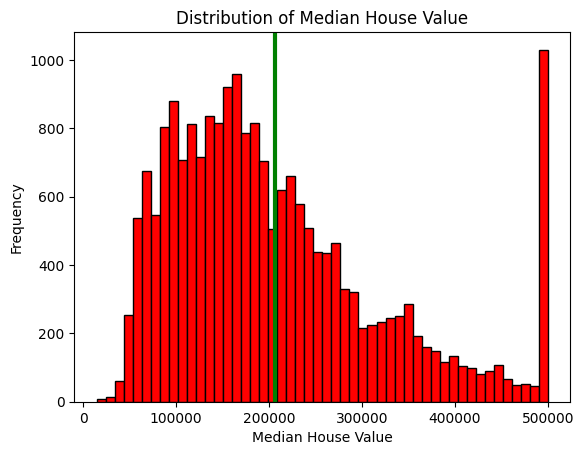

In [34]:
plt.hist(
    housing['median_house_value'],
    bins = 50,
    color = 'red',
    edgecolor='black' # Shows the indvidual bars

);
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.axvline(x = housing['median_house_value'].mean(), linewidth = 3, color = 'g');


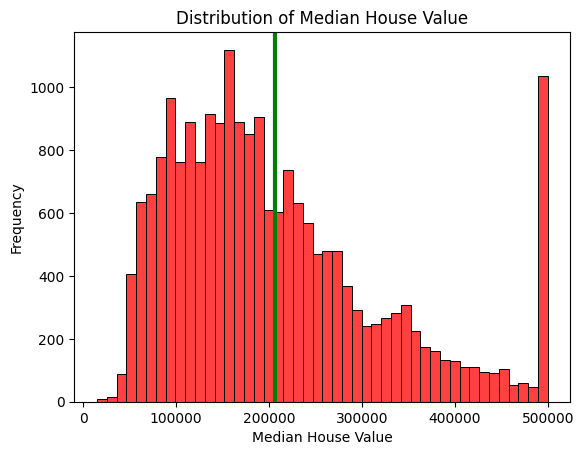

In [35]:
sns.histplot(
    data = housing['median_house_value'],
    color = 'red',   
)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.axvline(x = housing['median_house_value'].mean(), linewidth = 3, color = 'g');

In [36]:
px.histogram(
    housing['median_house_value'],
    nbins = 50
)
# Adding edgecolor for px is a long process so just stick with seaborn and matplotlib


Density Plots


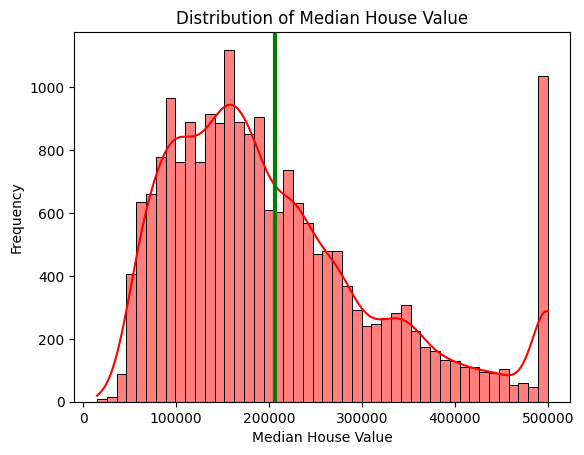

In [37]:
sns.histplot(
    data = housing['median_house_value'],
    color = 'red', 
    kde = True  
)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.axvline(x = housing['median_house_value'].mean(), linewidth = 3, color = 'g');

In [ ]:
pd.merge()